In [128]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

Let's define a function which we will try to model and generate some data

(20, 1) (50, 1)


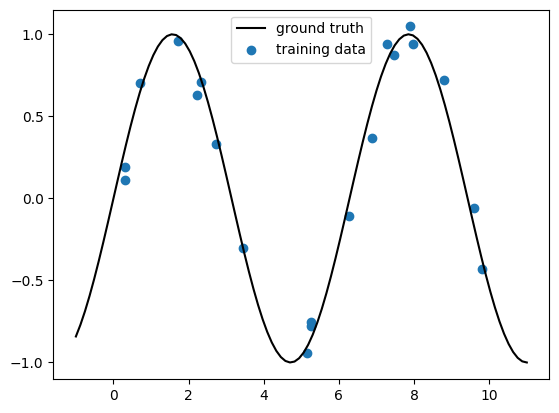

In [129]:
def f(x):
    return np.sin(x)

xs = np.linspace(-1, 11, 100)
ys = f(xs)

# X = np.linspace(0, 5, 100)
# np.random.shuffle(X)

X_train = np.random.choice(np.linspace(0, 10, 100), size=20).reshape(-1, 1)
X_test = np.random.choice(np.linspace(5, 15, 100), size=50).reshape(-1, 1)


print(X_train.shape, X_test.shape)

y_train = np.random.normal(loc=f(X_train), scale=0.1) # f(x) + N(f(x), 1)
y_test = np.random.normal(loc=f(X_test), scale=0.1)

fig, ax = plt.subplots()
ax.plot(xs, ys, color='black', label='ground truth')
ax.scatter(X_train, y_train, label='training data')
# ax.set_xlim(-0.5, 5.5)
ax.legend()


Now, we will try to model the generated data using a polynomial model. We want to try different polynomial degrees and visualize the results. We need to use `PolynomialFeatures` to generate powers of the original feature. Additionally, we use `make_pipeline` as a shorthand for building an estimator that first generates the polynomial features and then learns using `ElasticNet`.

polynomial degree 2: train score: 0.041673695662574284, test score: -0.8054242280606381
polynomial degree 3: train score: 0.09828594860260542, test score: -6.513746980726392
polynomial degree 4: train score: 0.9563003473351239, test score: -2310.303420740904


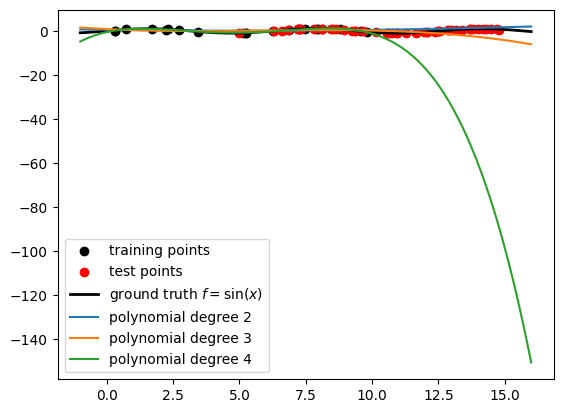

In [130]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, label='training points', color='black')
ax.scatter(X_test, y_test, label='test points', color='red')

xs = np.linspace(-1, 16, 100)
ax.plot(xs, f(xs), label='ground truth $f = \sin(x)$', color='black', linewidth=2)


for degree in range(2, 5):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    ys_pred = model.predict(xs.reshape(-1, 1))

    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    ax.plot(xs, ys_pred, label=f'polynomial degree {degree}')
    ax.legend()

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'polynomial degree {degree}: train score: {r2_train}, test score: {r2_test}')


In [131]:
import pandas as pd

df = pd.read_csv('./datasets/bluegills-length.csv')
df = df.sort_values(['age', 'length'])
df

,age,length
1,1,62
0,1,67
3,2,83
5,2,88
4,2,91
...,...,...
59,5,170
37,5,171
75,5,180
41,5,188


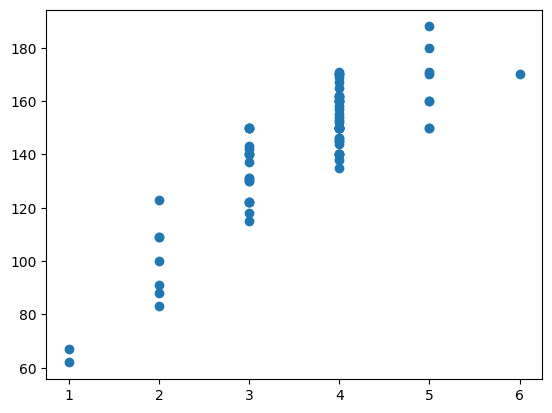

In [132]:
import seaborn as sns
# sns.lineplot(data=df, x='age', y='length')
plt.scatter(df['age'], df['length'])

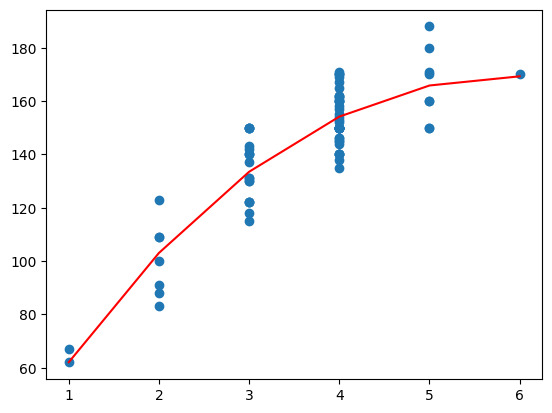

In [133]:
model = make_pipeline(PolynomialFeatures(6), LinearRegression())
x = df['age'].values.reshape(-1, 1)
y = df['length']
model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')

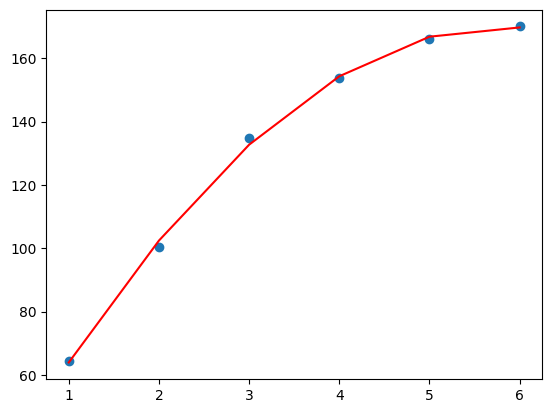

In [134]:
g = df.groupby(['age'])
x = df['age'].unique().reshape(-1, 1)
y = g.mean()['length']

model.fit(x, y)

y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')